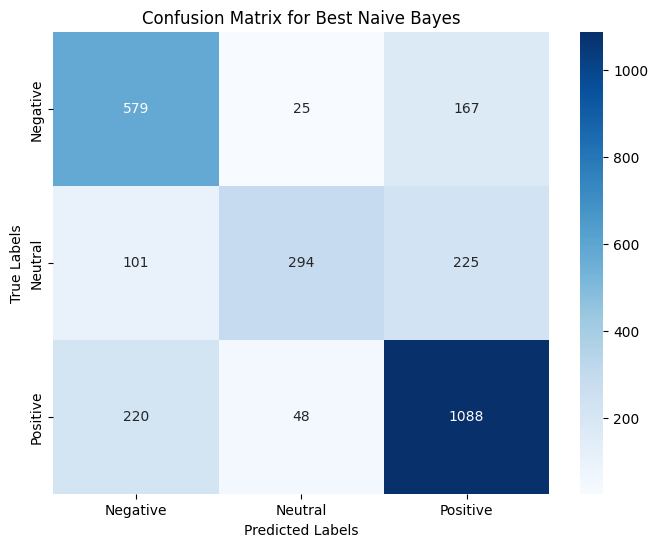


Metrics for Best Naive Bayes:

Negative Sentiment:
  Precision: 0.64
  Recall: 0.75
  F1-Score: 0.69
  Support: 771

Neutral Sentiment:
  Precision: 0.80
  Recall: 0.47
  F1-Score: 0.60
  Support: 620

Positive Sentiment:
  Precision: 0.74
  Recall: 0.80
  F1-Score: 0.77
  Support: 1356

Overall Metrics for Best Naive Bayes:
              Model  Accuracy (%)  Precision    Recall  F1-Score  Support
0  Best Naive Bayes     71.386968   0.726519  0.675842   0.68534     2747


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'tweets1_processed.csv'
tweets_df = pd.read_csv(file_path)

# Encode the target variable
label_encoder = LabelEncoder()
tweets_df['sentiment_encoded'] = label_encoder.fit_transform(tweets_df['sentiment'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    tweets_df['processed_text'], 
    tweets_df['sentiment_encoded'], 
    test_size=0.2, 
    random_state=42
)

# Convert text data into numerical format using CountVectorizer (Bag of Words)
count_vectorizer = CountVectorizer(max_features=5000)
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

# Hyperparameter tuning for Multinomial Naive Bayes
param_grid = {
    'alpha': [0.1, 0.5, 1.0],  # Additive smoothing parameter
}

# Initialize the Naive Bayes classifier
naive_bayes = MultinomialNB()

# Grid search cross-validation
grid_search = GridSearchCV(naive_bayes, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_counts, y_train)

# Best parameters found by GridSearch
best_params = grid_search.best_params_

# Train the model with best parameters
best_naive_bayes = MultinomialNB(alpha=best_params['alpha'])
best_naive_bayes.fit(X_train_counts, y_train)

# Predictions on test set
y_pred_best_naive_bayes = best_naive_bayes.predict(X_test_counts)

# Evaluate the model
best_metrics_naive_bayes = precision_recall_fscore_support(y_test, y_pred_best_naive_bayes)
best_conf_matrix_naive_bayes = confusion_matrix(y_test, y_pred_best_naive_bayes)

# Plot confusion matrix for the best model
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

plot_confusion_matrix(best_conf_matrix_naive_bayes, "Best Naive Bayes")

# Class-specific metrics for best model
def class_specific_metrics(y_test, y_pred):
    metrics = precision_recall_fscore_support(y_test, y_pred, labels=[0, 1, 2])
    return {
        "Negative": {
            "Precision": metrics[0][0],
            "Recall": metrics[1][0],
            "F1-Score": metrics[2][0],
            "Support": metrics[3][0]
        },
        "Neutral": {
            "Precision": metrics[0][1],
            "Recall": metrics[1][1],
            "F1-Score": metrics[2][1],
            "Support": metrics[3][1]
        },
        "Positive": {
            "Precision": metrics[0][2],
            "Recall": metrics[1][2],
            "F1-Score": metrics[2][2],
            "Support": metrics[3][2]
        }
    }

best_naive_bayes_metrics = class_specific_metrics(y_test, y_pred_best_naive_bayes)

# Print metrics for the best model
def print_metrics(model_name, metrics):
    print(f"\nMetrics for {model_name}:")
    for sentiment, scores in metrics.items():
        print(f"\n{sentiment} Sentiment:")
        print(f"  Precision: {scores['Precision']:.2f}")
        print(f"  Recall: {scores['Recall']:.2f}")
        print(f"  F1-Score: {scores['F1-Score']:.2f}")
        print(f"  Support: {scores['Support']}")

print_metrics("Best Naive Bayes", best_naive_bayes_metrics)

# Overall results for the best model
best_overall_results = {
    "Model": ["Best Naive Bayes"],
    "Accuracy (%)": [
        accuracy_score(y_test, y_pred_best_naive_bayes) * 100
    ],
    "Precision": [
        best_metrics_naive_bayes[0].mean()
    ],
    "Recall": [
        best_metrics_naive_bayes[1].mean()
    ],
    "F1-Score": [
        best_metrics_naive_bayes[2].mean()
    ],
    "Support": [
        best_metrics_naive_bayes[3].sum()
    ]
}

best_overall_results_df = pd.DataFrame(best_overall_results)

print("\nOverall Metrics for Best Naive Bayes:")
print(best_overall_results_df)
